In [41]:
import csv
import numpy as np

data = np.genfromtxt('./data/digits/data.csv', delimiter = ',', skip_header = 1, dtype = int)
with open('data_reduced_1.csv', 'w') as file_handle:
    writer = csv.writer(file_handle, delimiter = ',')
    for i in range(6000):
        writer.writerow(data[i,:])

# Session 2.2


## Logistic regression
- In the previous section we learned about linear regression, where we trained a model to make predictions about the output values $y$ of some input data $X$
- Now, we'll learn about ** logistic regression **, where the goal is to make classification decisions given some input data
    - For example, a lot of social media applications use classification models like logistic regression to predict whether a user will ** like ** 👍 or ** dislike ** 👎 a post
    - This is an example of a ** binary classification problem **, where the output can only have one of two values
    - For now we'll stick with binary problems, but later on we'll address how to generalize to multiple classification problems

- ** Objective: ** Given some input data $X$ and class associations $y\epsilon\{\mathrm{class 1, class 2}\}$, create and train a model that will predict the class of new data $X_{\mathrm{new}}$
- Immediately there's a problem, we need to attach a numerical value to the classes we're trying to predict, but classes don't have any intrinsic numerical values...
- Let's arbitrarily choose one of our classes to have value '1' and the other class to have value '0'
$$ |\mathrm{class 1}>\rightarrow 0, ~~~~|\mathrm{class 2}>\rightarrow 1 $$
- (We could have just named them 1 and 2, but 0 and 1 is the standard convention)



- We could now perform a linear regression and declare all outputs with $\hat{y}^{i}<0.5$ to be class 1, and all outputs with $\hat{y}^{i}>=0.5$ to be of class 2
- The following image shows the results of a linear regression that does just that
![linear regression w/ binray data](./images/linreg_classification.png)
- This isn't actually all that bad of an idea, but we can do better
- Instead, let's devise an algorithm that yields a ** probabilistic interpretation ** of the outputs, where the output of each input is a *prediction* about the probability that the input belongs to class 1
- In addition to that change, we should also rethink our choice of loss function; previously we used a loss function that was the sum of the residuals squared, but there's no reason to believe that this is the best cost function when our output predictions are probabilities from 0 to 1 and the actual outputs are binomially distributed
- Below is a picture comparing ** regression ** with ** classification **---notice that the output of the logistic regression model is a * probability *
![lin reg vs log reg](./images/regression_classification.png)



##### Giving our model a probabilistic interpretation---the link function
- In linear regression, we mapped the inputs to the outputs * via * the ** link function ** $\hat{y}^{i}=\vec{x}^{i}\vec{\beta}$
- Now we would like our predictions $y$ to be probabilities, so we need a link function $f$ that restricts the output to between 0 and 1: $f\left(\vec{x}^{i}\vec{\beta}\right)\epsilon\left[0,1\right]$
- One such function that squashes $\vec{x}^{i}\vec{\beta}$ into the range $\left[0,1\right]$ is the ** logistic function **, plotted below

$$ f\left(\vec{x}^{i}\vec{\beta}\right)=P\left(y^{i}=1\right)=\frac{1}{1+e^{-\vec{x}^{i}\vec{\beta}}} $$


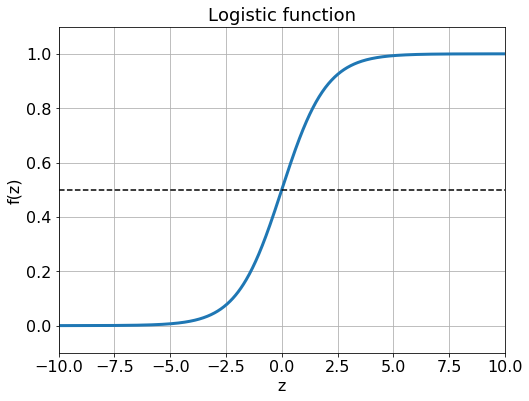

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(z):
    return 1./(1+np.exp(-z))

zs = np.linspace(-10,10,1000)


fig = plt.figure(figsize = (8,6))

plt.plot(zs, logistic_function(zs), lw = 3)
plt.plot([-10,10],[0.5,0.5], ls = '--', c = 'k')

plt.xlim(-10,10)
plt.ylim(-.1, 1.1)

plt.title('Logistic function', size = 18)
plt.xlabel('z', size = 16)
plt.ylabel('f(z)', size = 16)
plt.grid()
plt.tick_params(labelsize = 16)

plt.show()


$$ f\left(\vec{x}^{i}\vec{\beta}\right)=P\left(y^{i}=1\right)=\frac{1}{1+e^{-\vec{x}^{i}\vec{\beta}}} $$
- To understand the logistic function, its useful to consider three limiting cases
    - ** $\vec{x}^{i}\vec{\beta}\gg 1$ **: This equation says for large $\vec{x}^{i}\vec{\beta}$, the probability that data point $x_{i}$ belongs to class 1 is $P\left(y^{i}=1\right)\rightarrow 1$
    - ** $\vec{x}^{i}\vec{\beta}\ll -1$ **: $P\left(y^{i}=1\right)\rightarrow 0$
    - ** $\vec{x}^{i}\vec{\beta}\sim 0$ **: for $\vec{x}^{i}\vec{\beta}=0$, $P\left(y^{i}=1\right)=0.5$; both classes are equally likely
- The advantage of having our model's outputs be probabilities instead of a binary prediction of class 1 or 2 is it allows us to make appropriate decisions given the uncertainty
- For instance, if a model used in a cancer diagnostic predicts that a patience only has a 5% chance of having cancer, it is still probably worthwhile to bring them in for more tests. If the prediction is that the patient only has a 0.001% chance of cancer, no such tests are necessary.

##### Cross-entropy error, our new loss function for logistic regression
- As mentioned before, because our model is predicting probabilites rather than actual outputs, it is useful to consider new loss functions
- For logistic regression, we use the ** cross-entropy error ** loss function instead of the residual sum of squares function that we used for linear regression

$$ \mathrm{Error}=\sum_{i=0}^{N-1}\left[-y^{i}\log P\left(\hat{y}^{i}\right)-\left(1-y^{i}\right)\log\left(1-P\left(\hat{y}^{i}\right)\right)\right] $$

- In order to intuitively understand the error, consider three cases:
    - $y^{i}=1$, but we predict $P\left(y^{i}=1\right)=0.01$; a poor prediction
        - In this case, $y^{i}$ really belongs to class one, but we've given a strong prediction it belongs to class zero
        - The second term in the cross-entropy error loss function disappears, and the error of this individual term is $-\log 0.01=2$, a large error
    - $y^{i}=1$ and we predict $P\left(y^{i}=1\right)=0.99$; a great prediction
        - The error for this data point is $-\log 0.99=0.004$, a very small error
    - $y^{i}=0$ or $y^{i}=1$, and $P\left(y^{i}=1\right)=0.5$; a completely uncertain prediction
        - In any case, the error is $-\log 0.5=0.3$, a non-negligible but reasonable error

- Here's a plot of the cross-entropy error of a single data point, for both cases where the class is 0 or 1
- Notice the MASSIVE error associated with very very certain, wrong predictions

![cross-entropy error](./images/cross-entropy_loss.png)

- We have a loss function, great!
- Just like with linear regression, our task is now to find the parameters $\vec{\beta}$ that minimize the loss function
- This can be performed analytically or numerically, e.g. with gradient descent

##### That's all there is to it, folks!

# <font color="red">Student activity: Digit classification</font>
- Let's use our knowledge of logistic regression to build a digit recognizing application!
- We'll start by building a model that is able to detect whether a digit falls into one of two classes:
    - 0: Digit ** is ** a 0
    - 1: Digit ** is not ** a 0
- This application doesn't sound totally useful now, but we'll use it as the starting point for a model that will discriminate between all digits!

## Part 1: Building a zero/not zero classifier
- The data is contained in the './digits/data.csv' file; load it
- Take the first 80% of the file as training, last 20% as test data
- Separate the inputs from the outputs, and convert the outputs as described above ($0\rightarrow0$, $1-9\rightarrow1$)
    - Hint: Use `np.where(X_train == 0)` and `np.where(X_train != 0)` to get the indices of x = 0 and x != 0, respectively; then, use something like `X_train[indices] = 0 or 1`
- Create, train, and predict a model on the test data
    - Hint: Use the `sklearn.linear_model.LogisticRegression` class
- Answer the follow-up questions

### <font color="red">Imports</font>
- Put whichever imports you use here

In [44]:
##########################
# Insert solution below! #
##########################

# Python standard library

# Scipy
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

### <font color="red">Load the data</font>

In [46]:
##########################
# Insert solution below! #
##########################

# Open full file
file_path = './data/digits/data_reduced_large.csv'
full_data = np.genfromtxt(file_path, delimiter = ',', skip_header = 1)

# Get number of samples, features
N_total = full_data.shape[0]
N_train = int(0.8*N_total)

K = full_data.shape[1]

# Get number of samples, features
N_total = full_data.shape[0]
N_train = int(0.8*N_total)    # 80% of data should go into training
N_test = N_total - N_train

K = full_data.shape[1] - 1    # subtract 1 so we don't count the label as a feature
width = int(K**.5)            # Convenience constant for image width


# Split into train and test
X_train = full_data[:N_train, 1:K+1]
y_train = full_data[:N_train, 0]

X_test = full_data[N_train:, 1:K+1]
y_test = full_data[N_train:, 0]

# Set outputs (y) to binary type
chosen_digit = 1

change_indices_train = np.where(y_train == chosen_digit)[0]
keep_indices_train = np.where(y_train != chosen_digit)[0]
y_train[change_indices_train] = 0
y_train[keep_indices_train] = 1


change_indices_test = np.where(y_test == chosen_digit)[0]
keep_indices_train = np.where(y_test != chosen_digit)[0]
y_test[change_indices_test] = 0
y_test[keep_indices_train] = 1

### <font color="red">Create, train, and fit a model</font>

In [47]:
##########################
# Insert solution below! #
##########################
import time


# Put your code between the two time.time() functions if you wish to benchmark the fitting time


t0 = time.time()



model = sklearn.linear_model.LogisticRegression(C=1e10)    # Create model
model.fit(X_train, y_train)                          # Fit/train model
y_test_predictions = model.predict(X_test)           # Make predictions



t1 = time.time()
print('time elapsed (s):\t\t', t1-t0)

time elapsed (s):		 3.7048001289367676


### <font color="red">Answer/complete the following</font>

##### <font color="red">What do the features represent? What is the range of each feature? How many features are there? </font>

** Insert solution below! **

- Each image is flattened out into a one-dimensional array; each grayscale value [0-255] in the flattened array is a feature
- The features range from 0-255
- There are 28*28=784 features

##### <font color="red">In the ** training set ** how many class 0s are there? Class 1s? Are the classes balanced?</font>

In [48]:
##########################
# Insert solution below! #
##########################

N_train_zeroes = np.where(y_train==0)[0].shape[0]    # Number of 0s
N_train_ones = N_train - N_train_zeroes              # Number of non-0s

print(N_train_zeroes, N_train_ones)

451 4348


No, the classes are not balanced.

##### <font color="red">Plot three examples of class 0 and three examples of class 1; be sure to plot them in the two-dimensional form.</font>
- Hint: Write a function that takes an input as its function argument and plots it

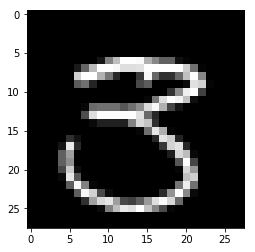

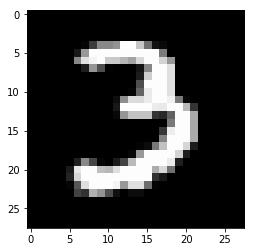

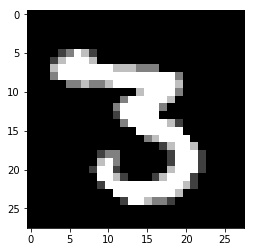

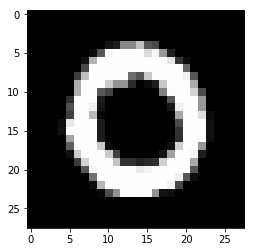

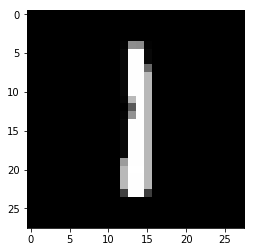

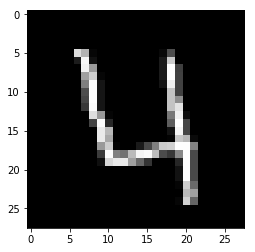

In [49]:
##########################
# Insert solution below! #
##########################

def PlotDigit(x):
    plt.imshow(x.reshape(width, width), cmap = 'gray', interpolation = 'none', vmin = 0, vmax = 255)
    plt.show()
    
# Plot the 0s
for i in np.where(y_train == 0)[0][:3]:
    PlotDigit(X_train[i])
    
# Plot the 1s
for i in np.where(y_train != 0)[0][:3]:
    PlotDigit(X_train[i])

##### <font color="red">Calculate the ** total error rate **, ** false positive rate **, and ** false negative rate **</font>

- A false positive occurs when $\hat{y}^{i}=1$ but $y^{i}=0$
- A false negative is when $\hat{y}^{i}=0$ but $y^{i}=1$

In [50]:
##########################
# Insert solution below! #
##########################


total_error_rate = len(np.where(y_test != y_test_predictions)[0])/N_test

false_positive_rate = len(np.where(y_test[y_test == 0] != y_test_predictions[y_test == 0]))/N_test

false_negative_rate = len(np.where(y_test[y_test != 0] != y_test_predictions[y_test != 0]))/N_test

print(total_error_rate, false_positive_rate, false_negative_rate)

0.058333333333333334 0.0008333333333333334 0.0008333333333333334


##### <font color="red">Find three examples of a ** false positive ** and two examples of ** false negatives **. Plot each. Print the probability associated with each prediction (hint: Look at the sklearn docs!). Is it evident why the model failed to accurately predict the class?</font>

false positives (predicted not zero, actually is zero)
[[  5.44442871e-07   9.99999456e-01]]


/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


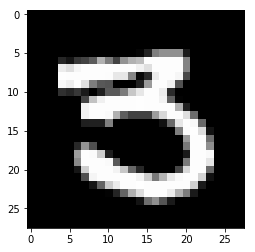

/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[[ 0.  1.]]


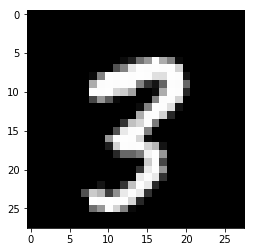

/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[[ 0.  1.]]


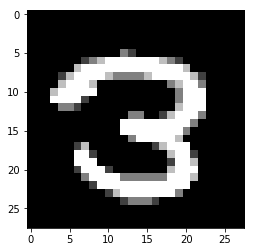

false negatives (predicted zero, is not actually zero)
[[  9.99998028e-01   1.97230357e-06]]


/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


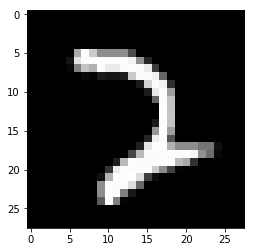

/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[[  1.00000000e+00   2.06279687e-13]]


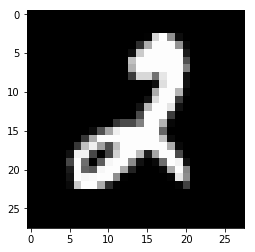

/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[[  9.99999999e-01   8.80242930e-10]]


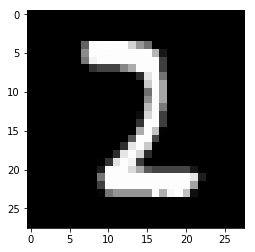

In [51]:
false_positive_indices = np.where((y_test!= y_test_predictions) & (y_test == 0))[0][:3]
false_negative_indices = np.where((y_test!= y_test_predictions) & (y_test == 1))[0][:3]


print('false positives (predicted not zero, actually is zero)')
for index in false_positive_indices:
    print(model.predict_proba(X_test[index]))
    PlotDigit(X_test[index])
    
print ('false negatives (predicted zero, is not actually zero)')
for index in false_negative_indices:
    print(model.predict_proba(X_test[index]))
    PlotDigit(X_test[index])

###  Beyond binary predictions---logistic regression with $>2$ classes
- Cool, so we just figured out how to distinguish between 0s and non-0s, and did a pretty good job
- Great job! 
# 👍👍👍👍👍👍👍👍👍👍
- Adapting what we did above to classify the full range of digits 0-9 is actually not all that hard
- There are a few ways we can proceed, but we're going to go with a method called ** one-vs-rest ** logistic regression (OvR logistic regression)
- How does it work?


##### One-vs-rest logistic regression
1. Train one model per class category; in this case, there will be 10 models for the 10 possible digits
2. Each model is like the model we created above, but for a different number
    - For instance, the classes for model 3 will be 'digit is 3' (1) and 'digit is not 3' (0)
3. So, we train 10 models to predict whether a digit is or is not an example of that model's selected digit
4. Finally, when making predictions on test data, we go with the digit belonging to the model that had the most confidence



- Example:
            
| Model | Positive prediction probability            |
|-------|--------------------------------------------|
| 0     | .15                                        |
| 1     | .10                                        |
| 2     | .03                                        |
| ** 3 **     | ** .89 **                                       |
| 4     | .12                                        |
| 5     | .66                                        |
| 6     | .13                                        |
| 7     | .10                                        |
| 8     | .24                                        |
| 9     | .70                                        |

- Thus, for the above example because model 3 is the most confident that the input is positive, we predict that the digit is a 3

##### Multiclass logistic regression with scikit-learn
- The above describes what we ** would ** do if we were implementing this ourselves
- Fortunately, sklearn is smart enough to do the hard work for us! We simply need to create a single sklearn.linear_model.LogisticRegression() model, and it will implement OvR logistic regression on its own by default, although other multiclassification approaches can be specified as well

### Part 2: Building a complete digit recognizer
- Load the data, but don't split it into training and testing; put it all in training data
- Create and train a model to predict digits using sklearn.linear_model.LogisticRegression()
- Test the model on ** 10 ** of your own hand written digits, 0-9
- Write some digits on a piece of paper, snap a photo with a smart phone, and send to your e-mail
- After downloading, run them through the preprocessing steps already coded-up below (you may have to slightly alter some of the parameters, read the notes in the cell)
    - Hints:
        - Draw on the white board, if you so desire
        - Draw thick lines
        - Make sure your paper/whiteboard is uniformly and well lit
        - Make sure there are no other stray pen marks in a region around each hand drawn digit

- Determine the accuracy on the 10 hand-written digits    

## <font color="red">Student activity: 0-9 Digit classification</font>

### <font color="red">Imports</font>

In [52]:
%reset -f

# Python standard library
import time

# Scipy
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

### <font color="red">Load data</font>

In [55]:
##########################
# Insert solution below! #
##########################

# Open full file
file_path = './data/digits/data_reduced_large.csv'
full_data = np.genfromtxt(file_path, delimiter = ',', skip_header = 1)




K = full_data.shape[1] - 1    # subtract 1 so we don't count the label as a feature
width = int(K**.5)            # Convenience constant for image width


# Split into inputs and outputs
X = full_data[:, 1:K+1]
y = full_data[:, 0]

In [56]:
print(X.shape)
print(y.shape)

(5999, 784)
(5999,)


### <font color="red">Create, train, and fit a model</font>

In [57]:
##########################
# Insert solution below! #
##########################

# Put your code between the two time.time() functions if you wish to benchmark the fitting time

t0 = time.time()



model = sklearn.linear_model.LogisticRegression(n_jobs = -1, C = 1e10)    # Create model
model.fit(X, y) # Fit/train model



t1 = time.time()
print('time elapsed (s):\t\t', t1-t0)

time elapsed (s):		 208.53340244293213


### Hand-drawn digit (pen and paper)

In [61]:
import scipy

debugging info
1470 1951 955 1321 [1710, 1138] 915


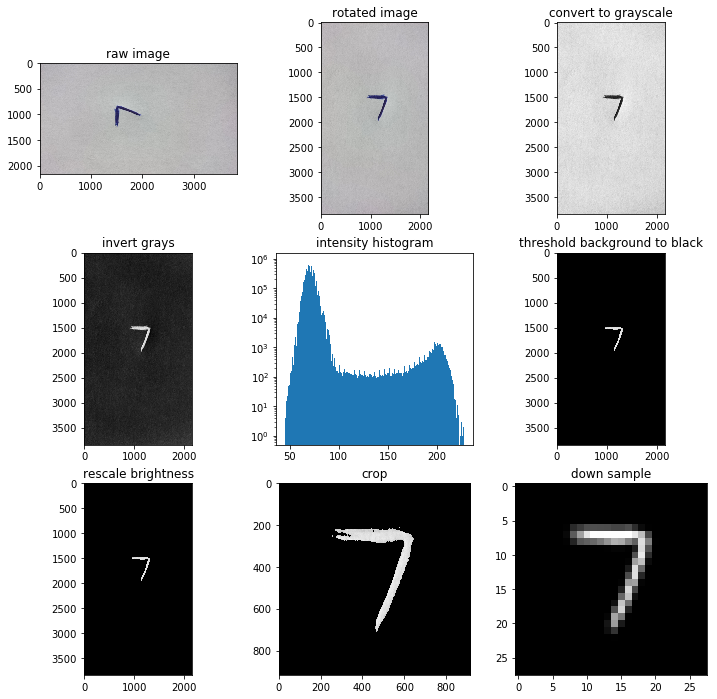

[ 7.]


/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [66]:
def PreprocessImage(image_file_path):
    # Set up fig
    fig, axes = plt.subplots(3, 3, figsize = (12,12))
    
    custom_digit = plt.imread(image_file_path)[:,:,[0,1,2]]
    
    # Load in .png image
    plt.sca(axes[0,0])
    plt.imshow(custom_digit)
    plt.title('raw image')
    


    # Remove alpha channel
    custom_digit = custom_digit[:,:,[0,1,2]]

    


    # Rotate image
    # This step may not be necessary; my phone always rotates images for some reason...
    plt.sca(axes[0,1])
    
    custom_digit = np.rot90(custom_digit, axes = (1,0))
    plt.imshow(custom_digit, cmap = 'gray')
    plt.title('rotated image')


    # Average RGB channels
    plt.sca(axes[0,2])
    
    custom_digit = np.mean(custom_digit, axis = 2)
    plt.imshow(custom_digit, cmap = 'gray')
    plt.title('convert to grayscale')
    


    # Invert grays
    plt.sca(axes[1,0])
    
    custom_digit = 255-custom_digit
    plt.imshow(custom_digit, cmap = 'gray')
    plt.title('invert grays')
    


    # Histogram
    plt.sca(axes[1,1])
    
    plt.hist(custom_digit.flatten(), bins = 255)
    plt.yscale('log', nonposy='clip')
    
    plt.title('intensity histogram')
    


    # Threshold background to black
    
    # Set the correct threshold to separate the dark background from the light foreground (the letters)
    # The threshold should be between the very large background peak and the smaller peak in the middle
    
    plt.sca(axes[1,2])

    threshold = 175
    custom_digit[custom_digit < threshold] = 0
    plt.imshow(custom_digit, cmap = 'gray')
    
    plt.title('threshold background to black')
    
    # Rescale
    plt.sca(axes[2,0])
    
    custom_digit = custom_digit*255./np.max(custom_digit)
    
    plt.imshow(custom_digit, cmap = 'gray')
    
    plt.title('rescale brightness')


    # Crop image
    plt.sca(axes[2,1])
    
    
    threshold = 1
    digit_top_row = np.where(np.mean(custom_digit, axis = 1) > threshold)[0][0]
    digit_bottom_row = np.where(np.mean(custom_digit, axis = 1) > threshold)[0][-1]
    digit_left_column = np.where(np.mean(custom_digit, axis = 0) > threshold)[0][0]
    digit_right_column = np.where(np.mean(custom_digit, axis = 0) > threshold)[0][-1]

    center = [int((digit_bottom_row + digit_top_row)/2.), int((digit_right_column + digit_left_column)/2.)]

    width = int(2.5*(digit_right_column - digit_left_column))

    new_top_row = center[0] - int(width/2.)
    new_bottom_row = new_top_row + width

    new_left_column = center[1] - int(width/2.)
    new_right_column = new_left_column + width


    custom_digit = np.copy(custom_digit[new_top_row:new_bottom_row + 1, new_left_column:new_right_column + 1])
    plt.imshow(custom_digit, cmap = 'gray')
    
    plt.title('crop')
    
    print('debugging info')
    print(digit_top_row, digit_bottom_row, digit_left_column, digit_right_column, center, width)
    

    # Down sample image
    plt.sca(axes[2,2])
    custom_digit = scipy.misc.imresize(custom_digit, size = (28, 28))
    plt.imshow(custom_digit, cmap = 'gray')
    
    plt.title('down sample')
    
    
    plt.show()
    
    return custom_digit


custom_digit = PreprocessImage('./data/digits/hand-drawn_7_0.JPG')

print(model.predict(custom_digit.flatten()))

### Hand-drawn digit (digital)
- Open your favorite paint tool (ms paint, gimp, photoshop, etc.) and create a 28x28 pixel image
- Paint the background black, draw your letter in white using the paint brush or air brush tool
- Save and replace the following string to the location of your digit

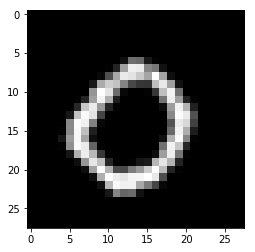

[ 0.]


/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [60]:
# Load in .png image
custom_digit = plt.imread('./data/digits/custom_digit.png')[:,:,[0,1,2]]

# Remove alpha channel
custom_digit = custom_digit[:,:,[0,1,2]]

# Average RGB channels
custom_digit = np.mean(custom_digit, axis = 2)

# Rescale [0-1]->[0,255]
custom_digit = custom_digit*255

plt.imshow(custom_digit, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
plt.show()

print(model.predict(custom_digit.flatten()))

# Summary

- In summary, we learned about ** logistic regression **, a generalized linear model that allows us to learn to make categorical predictions by learning on labelled data
- ** Logistic regression ** is very similar to ** linear regression **, with only a few major differences
    1. The data is * categorical *
    2. The predictions are * probabilities *
    3. Logistic regression uses the ** logistic function ** as its link function
        - Logistic regression: 
        $$f\left(\vec{x}^{i}\vec{\beta}\right)=\frac{1}{1+e^{-\vec{x}^{i}\vec{\beta}}}$$
        - Linear regression:
        $$f\left(\vec{x}^{i}\vec{\beta}\right)=\vec{x}^{i}\vec{\beta}$$
    4. Logistic regression uses the ** cross-entropy error ** which has the form
        - Logistic regression:
        $$\mathrm{Error}=\Sigma_{i=0}^{N-1}\left[-y^{i}\log \hat{y}^{i} - \left(1-y^{i}\right)\log\left(1-\hat{y}^{i}\right)\right]$$
        - Linear regression: (residual sum of squares)
        $$\mathrm{Error}=\Sigma_{i=0}^{N-1}\left(y^{i}-\hat{y}^{i}\right)^{2}$$
        
- Two useful quantities for assessing a logistic regression model are the ** false positive rate ** (rate of predicting class 1 when really class 0) and ** false negative rate ** (rate of predicting class 0 when really class 1)
- ** One-versus-Rest (OvR) ** logistic regression can extend plain logistic regression to cover multiple classifications instead of binary classifications
- Scikit-learn is an amazing tool for getting logistic regression classifiers trained and making predictions in a short amount of time; building our hand-written digit detector took ~30 minutes, and only ~5 minutes to train!

### Data engineering
- Another point that wasn't explicitly stated in this section was that model building and fitting is only the tip of the iceberg when it comes to data science problems
- The modeling part of the code-base only took 3 lines and little effort:
    - `model = sklearn.linear_model.LogisticRegression([parameters])`
    - `model.fit(X, y)`
    - `model.predict(X_new, y_new)`
    
- Compare this with the amount of code to load the data and preprocess it
- Model building is a hugely important part of data science, but so is all the preprocessing that takes place!
- Raw data is seldom, if ever, in a form that we can throw into a model without processing
- 'Data engineering' is a huge part of every data science problem!
- Python is an amazing tool for processing and analyzing data